fy_intrude_plate2ex_angleNeg60ex_len10_t1_Fri_Jun_20_19_21_13_2025.csv: Slope = -0.2865 N/cm²
fy_intrude_plate2ex_angleNeg60ex_len10_t2_Fri_Jun_20_19_24_38_2025.csv: Slope = -0.5852 N/cm²
fy_intrude_plate2ex_angleNeg60ex_len10_t3_Fri_Jun_20_19_25_37_2025.csv: Slope = -0.6070 N/cm²
fy_intrude_plate2ex_angleNeg60ex_len10_t4_Fri_Jun_20_19_26_25_2025.csv: Slope = -0.3215 N/cm²
fy_intrude_plate2ex_angleNeg60ex_len10_t5_Fri_Jun_20_19_27_29_2025.csv: Slope = -0.3900 N/cm²
Average Fy slope across files: -0.4380 N/cm²


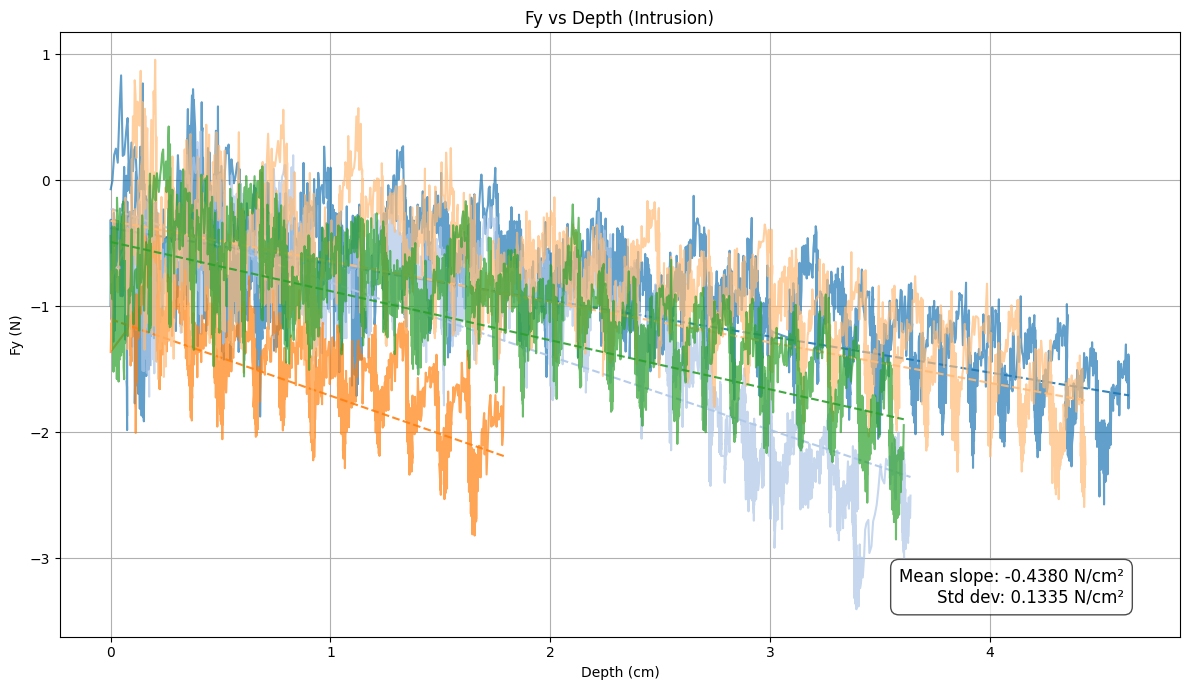

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import itertools

def plot_fy_with_colors(folder_path):
    slopes = []
    plt.figure(figsize=(12, 7))

    color_cycle = itertools.cycle(plt.cm.tab20.colors)  # 20 distinct colors

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(path)
                if 'depth' in df.columns and 'toeforce_y' in df.columns:
                    df_clean = df[df['depth'] >= 0]
                    color = next(color_cycle)

                    # Original data - solid line
                    plt.plot(df_clean['depth'], df_clean['toeforce_y'], color=color, alpha=0.7)

                    slope, intercept, _, _, _ = linregress(df_clean['depth'], df_clean['toeforce_y'])
                    slopes.append(slope)

                    print(f"{file}: Slope = {slope:.4f} N/cm²")

                    # Regression line - dotted
                    fit_line = slope * df_clean['depth'] + intercept
                    plt.plot(df_clean['depth'], fit_line, linestyle='--', color=color, alpha=0.9)

                else:
                    print(f"Skipping {file} — missing 'depth' or 'toeforce_y' columns")
            except Exception as e:
                print(f"Error processing {file}: {e}")

    plt.title("Fy vs Depth (Intrusion)")
    plt.xlabel("Depth (cm)")
    plt.ylabel("Fy (N)")
    plt.grid(True)

    if slopes:
        mean_slope = np.mean(slopes)
        std_slope = np.std(slopes)
        textstr = f"Mean slope: {mean_slope:.4f} N/cm²\nStd dev: {std_slope:.4f} N/cm²"
        plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='bottom', horizontalalignment='right',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
    else:
        print("No valid Fy files processed.")
    
    print(f"Average Fy slope across files: {np.mean(slopes):.4f} N/cm²")

    plt.tight_layout()
    plt.show()

folder_path = r"C:\Users\Tarunika P\Desktop\Summer '25 Intern\USC\LASSIE\LASSIE_DataForHeatMap\LASSIE_DataForHeatMap\cut files\cutfiles_plate2ex_angleNeg60\fy_intrude_plate2ex_angleNeg60"
plot_fy_with_colors(folder_path)
